In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/StudyData/winequality-white.xlsx')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


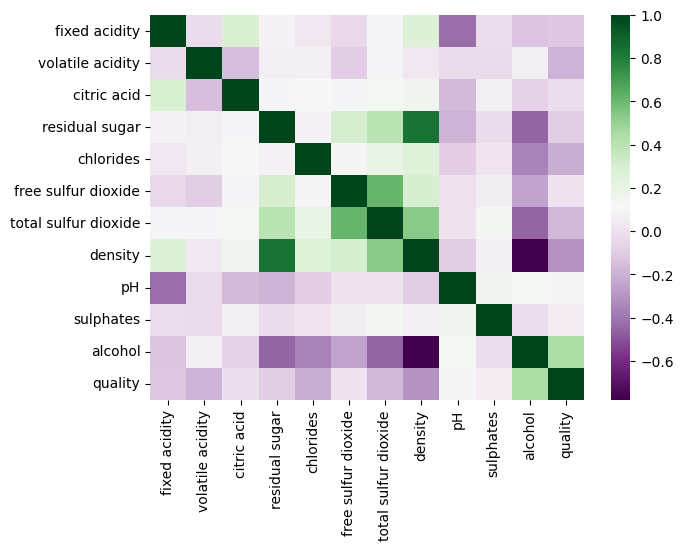

In [6]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='PRGn')
plt.show()

In [7]:
X = df.drop(['quality'],axis=1)
y = df['quality']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (3428, 11), Test : (1470, 11)


In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(max_depth = None, max_features = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 150)

# Обучаем модель на тренировочных данных
RFModel.fit(X_train, y_train)

RandomForestRegressor(max_features=3, n_estimators=150)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = RFModel.predict(X_test)
print(f'R2 = {r2_score(y_test, y_pred):.2f}')
print(f'RMSE = {mean_squared_error(y_test, y_pred):.2f}')

R2 = 0.48
RMSE = 0.42


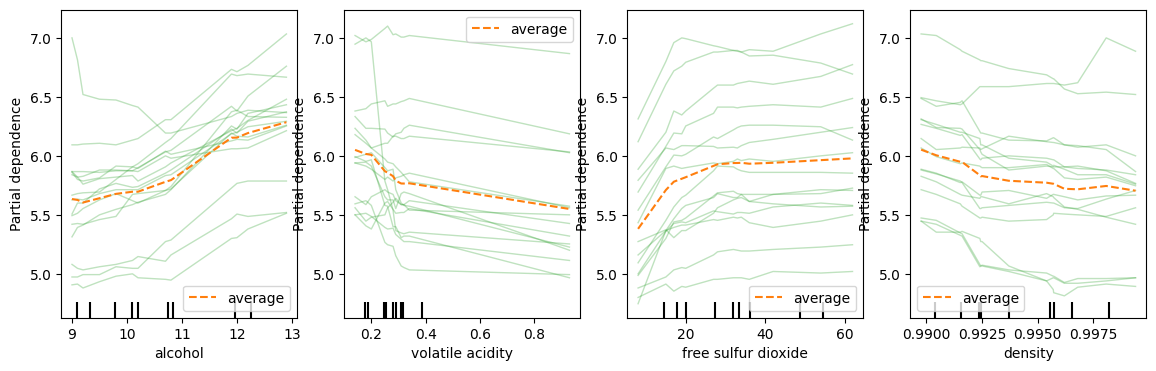

In [11]:
from sklearn.inspection import PartialDependenceDisplay
features = ['alcohol', 'volatile acidity', 'free sulfur dioxide', 'density']
fig, ax = plt.subplots(ncols=4, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(RFModel, X_test.iloc[:15,:],
                                                  features, kind = 'both', random_state=0,
                                                  ice_lines_kw = {'color':'tab:green', 'linewidth':1},
                                                  pd_line_kw = {'color':'tab:orange', 'linestyle':'--'}, ax = ax)

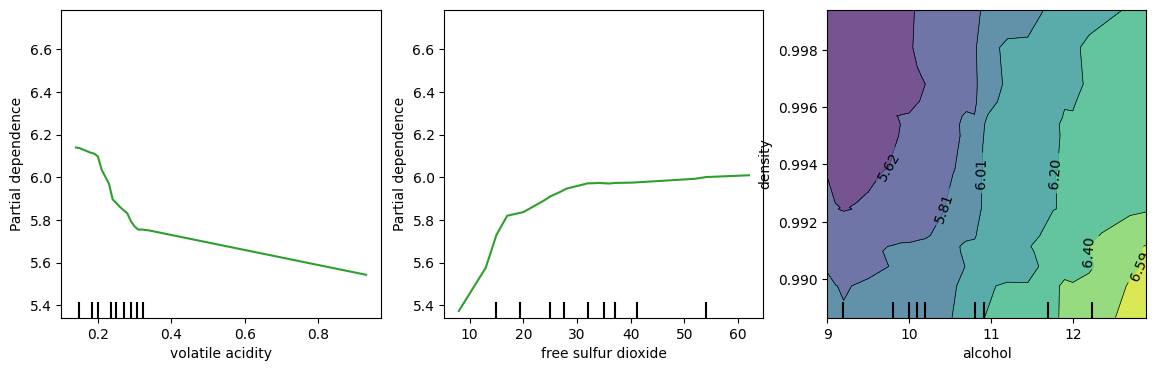

In [12]:
features2 = ['volatile acidity', 'free sulfur dioxide', ('alcohol', 'density')]
fig, ax = plt.subplots(ncols=3, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(RFModel, X_test.iloc[:25,:],
                                                  features2, kind = 'average', random_state=0,
                                                  pd_line_kw = {'color':'tab:green', 'linestyle':'-'}, ax = ax)

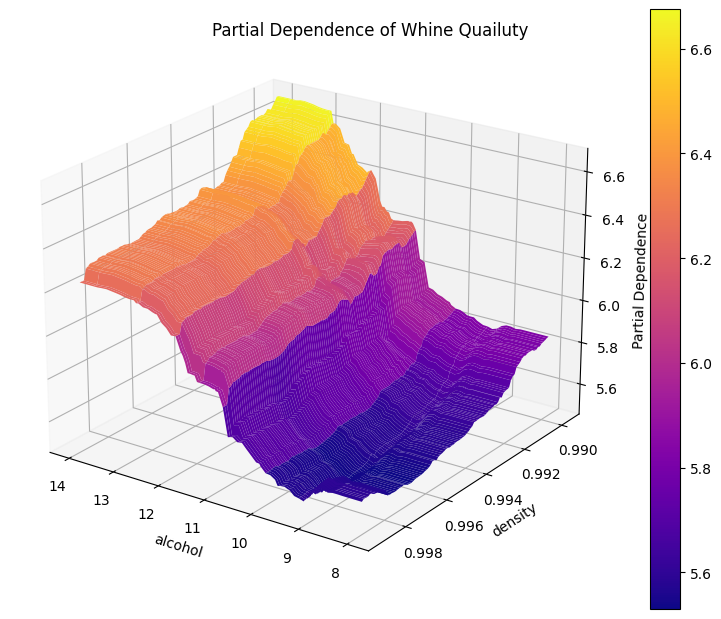

In [13]:
from sklearn.inspection import partial_dependence
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))

features3 = ['alcohol','density']
pdp = partial_dependence(RFModel, X_test, features = features3, kind = 'average')
XX, YY = np.meshgrid(pdp['values'][0],pdp['values'][1])
Z = pdp.average[0].T
ax = Axes3D(fig)
fig.add_axes(ax)
surface = ax.plot_surface(XX, YY, Z, rstride=1, cmap = plt.cm.plasma)
ax.set_xlabel(features3[0])
ax.set_ylabel(features3[1])
ax.set_zlabel('Partial Dependence')
ax.view_init(elev = 22, azim = 125)
plt.colorbar(surface)
plt.suptitle('Partial Dependence of Whine Quailuty')
plt.show()

In [14]:
from sklearn.inspection import permutation_importance
scoring = ['r2', 'neg_mean_absolute_percentage_error','neg_mean_squared_error']
r_multi_pi = permutation_importance(RFModel, X, y, n_repeats=30, random_state=1, scoring = scoring)

for metric in r_multi_pi:
  print(f'Metric: {metric}')
  r_pi = r_multi_pi[metric]
  for i in r_pi.importances_mean.argsort()[::-1]:
    if r_pi.importances_mean[i]-2*r_pi.importances_std[i]>0:
      print(f'{X.columns[i]:<8}',f'{r_pi.importances_mean[i]:.3f}',f' +/- {r_pi.importances_std[i]:3f}')
  print('')

Metric: r2
alcohol  0.425  +/- 0.008303
volatile acidity 0.229  +/- 0.005221
density  0.181  +/- 0.003377
free sulfur dioxide 0.166  +/- 0.003735
chlorides 0.125  +/- 0.003399
residual sugar 0.108  +/- 0.001862
total sulfur dioxide 0.103  +/- 0.003001
pH       0.100  +/- 0.002611
citric acid 0.089  +/- 0.001865
fixed acidity 0.070  +/- 0.001313
sulphates 0.066  +/- 0.001283

Metric: neg_mean_absolute_percentage_error
alcohol  0.046  +/- 0.000725
volatile acidity 0.031  +/- 0.000429
density  0.027  +/- 0.000411
free sulfur dioxide 0.023  +/- 0.000305
chlorides 0.021  +/- 0.000336
residual sugar 0.019  +/- 0.000218
total sulfur dioxide 0.018  +/- 0.000290
citric acid 0.017  +/- 0.000237
pH       0.016  +/- 0.000235
fixed acidity 0.013  +/- 0.000169
sulphates 0.013  +/- 0.000155

Metric: neg_mean_squared_error
alcohol  0.333  +/- 0.006512
volatile acidity 0.179  +/- 0.004094
density  0.142  +/- 0.002648
free sulfur dioxide 0.130  +/- 0.002929
chlorides 0.098  +/- 0.002666
residual sugar 0

In [15]:
perm_importances = permutation_importance(RFModel, X, y, n_repeats=30, random_state=1)

for i in perm_importances.importances_mean.argsort()[::-1]:
  if perm_importances.importances_mean[i]-2*perm_importances.importances_std[i]>0:
    print(f'{X.columns[i]:<8}',f'{perm_importances.importances_mean[i]:.3f}',f' +/- {perm_importances.importances_std[i]:3f}')

alcohol  0.425  +/- 0.008303
volatile acidity 0.229  +/- 0.005221
density  0.181  +/- 0.003377
free sulfur dioxide 0.166  +/- 0.003735
chlorides 0.125  +/- 0.003399
residual sugar 0.108  +/- 0.001862
total sulfur dioxide 0.103  +/- 0.003001
pH       0.100  +/- 0.002611
citric acid 0.089  +/- 0.001865
fixed acidity 0.070  +/- 0.001313
sulphates 0.066  +/- 0.001283


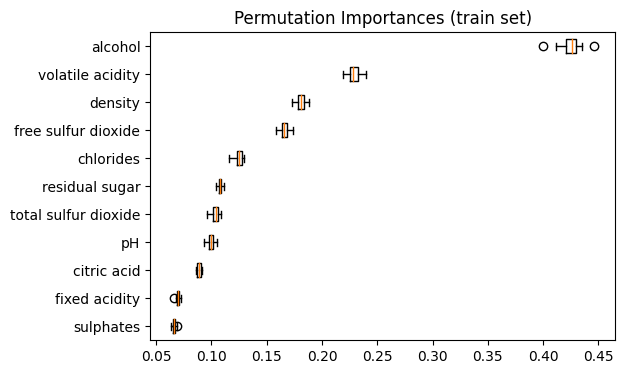

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
sorted_idx = perm_importances.importances_mean.argsort()
ax.boxplot(perm_importances.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
ax.set_title('Permutation Importances (train set)')
plt.show()

In [17]:
%%bash
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.3 MB/s eta 0:00:00


In [18]:
import shap

In [19]:
rf_explainer = shap.TreeExplainer(RFModel)
rf_shap_values = rf_explainer.shap_values(X_test)

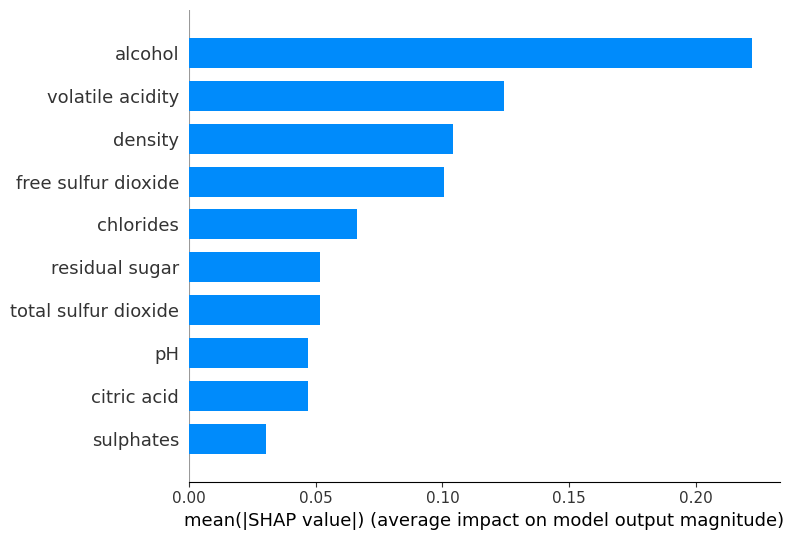

In [20]:
shap.summary_plot(rf_shap_values, X_test, plot_type = 'bar', max_display = 10)

In [21]:
rfModel_1_shap_values = rf_explainer.shap_values(X.iloc[15,:])
rfModel_15_shap_values = rf_explainer.shap_values(X.iloc[15:30,:])
rfModel_all_shap_values = rf_explainer.shap_values(X)

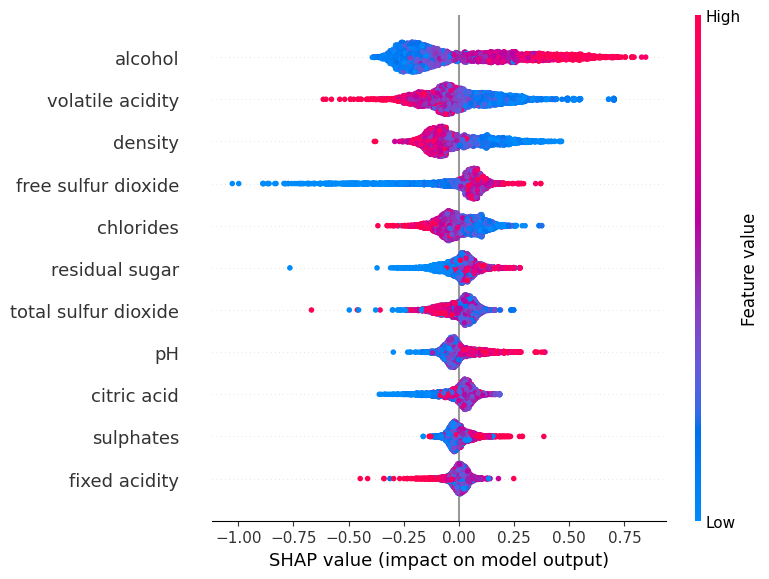

In [22]:
shap.summary_plot(rfModel_all_shap_values, X)

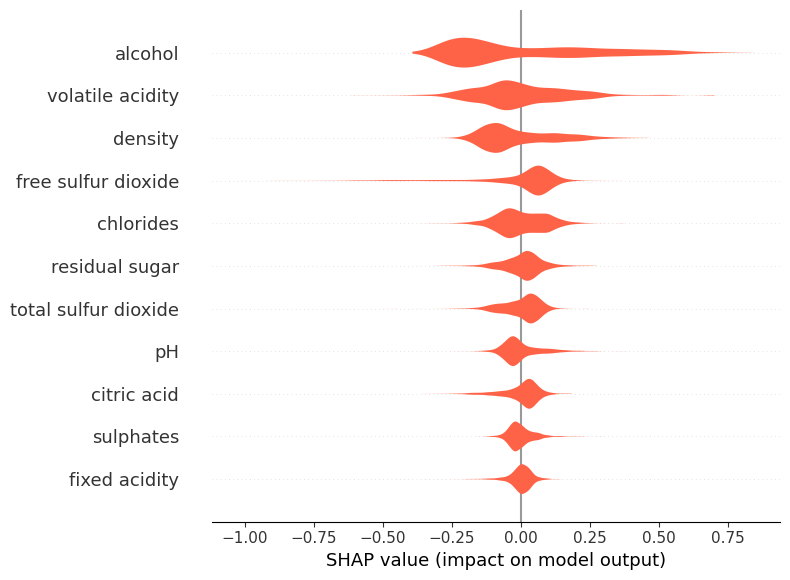

In [23]:
shap.summary_plot(rf_explainer.shap_values(X), feature_names = X.columns.tolist(), plot_type = 'violin', color = 'Tomato')

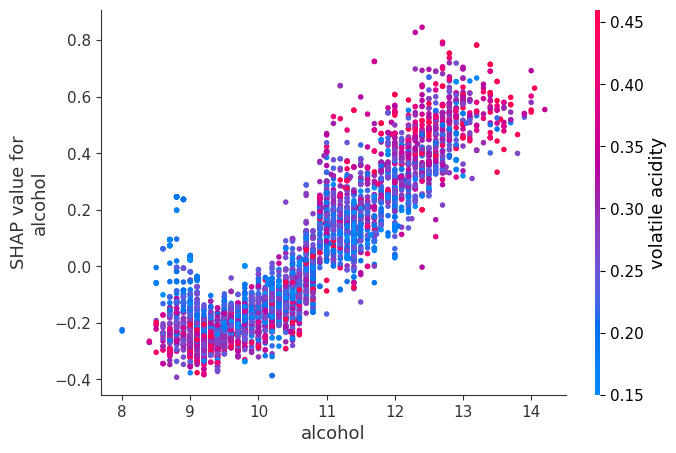

In [24]:
shap.dependence_plot('alcohol', rfModel_all_shap_values, X, interaction_index='volatile acidity')

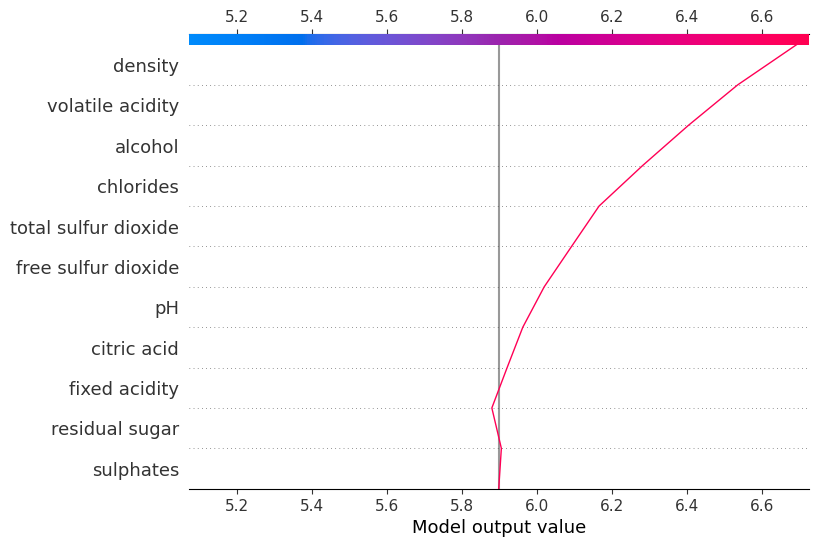

In [25]:
shap.decision_plot(rf_explainer.expected_value,
                   rfModel_1_shap_values,
                   feature_names = X.columns.tolist())


In [26]:
shap.plots.initjs()
shap.plots.force(rf_explainer.expected_value,rfModel_1_shap_values,
                 feature_names = X.columns.tolist())

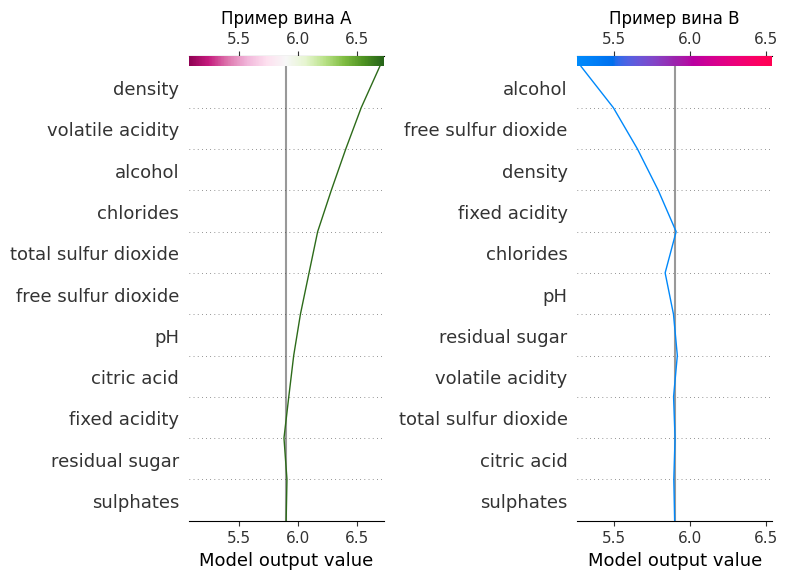

In [27]:
import matplotlib.pyplot as plt

rfModel_1b_shap_values = rf_explainer.shap_values(X.iloc[11,:])

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
shap.decision_plot(rf_explainer.expected_value,
                   rfModel_1_shap_values, plot_color = 'PiYG',
                   feature_names = X.columns.tolist(), show=False)
ax1.title.set_text('Пример вина А')

ax2 = fig.add_subplot(122)
shap.decision_plot(rf_explainer.expected_value,
                   rfModel_1b_shap_values,
                   feature_names = X.columns.tolist(), show=False)
ax2.title.set_text('Пример вина B')
plt.tight_layout()
plt.show()

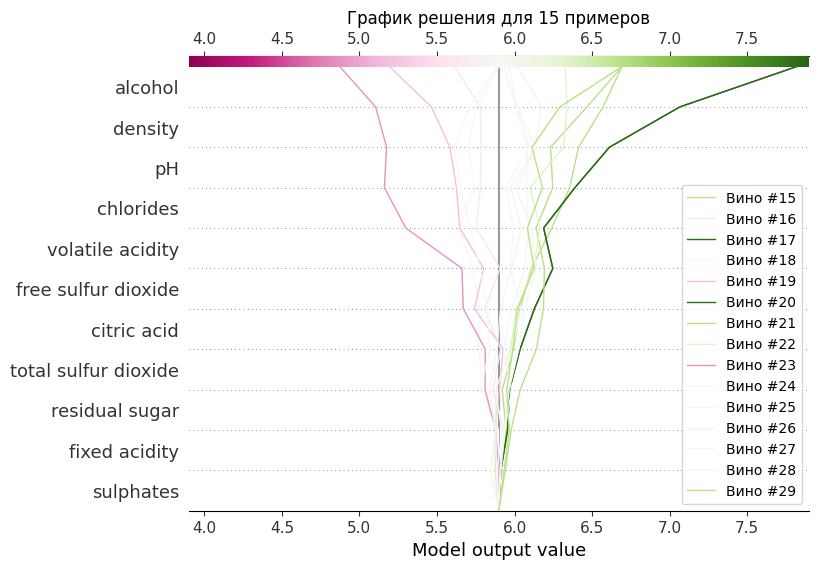

<Figure size 700x700 with 0 Axes>

In [28]:
legend_str = ['Вино #15','Вино #16','Вино #17','Вино #18','Вино #19',
             'Вино #20','Вино #21','Вино #22','Вино #23','Вино #24',
             'Вино #25','Вино #26','Вино #27','Вино #28','Вино #29']
shap.decision_plot(rf_explainer.expected_value,
                   rfModel_15_shap_values,
                   feature_names = X.columns.tolist(),
                   title = 'График решения для 15 примеров',
                   color_bar = True, plot_color = 'PiYG', show = False, legend_labels = legend_str,
                   legend_location = 'lower right')
plt.figure(figsize=(7,7))
plt.show()

In [29]:
shap_interaction_values = rf_explainer.shap_interaction_values(X_test)
shap_interaction_values[0].round(2)

array([[ 0.03, -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,
         0.  , -0.01],
       [-0.  , -0.15,  0.  , -0.  , -0.01,  0.01, -0.  ,  0.02, -0.  ,
         0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.03, -0.01,  0.  ,  0.01, -0.  ,  0.  , -0.  ,
        -0.  , -0.  ],
       [ 0.  , -0.  , -0.01, -0.06, -0.  ,  0.01,  0.  ,  0.  ,  0.  ,
         0.  , -0.01],
       [-0.  , -0.01,  0.  , -0.  , -0.08,  0.01,  0.  ,  0.01,  0.  ,
        -0.  ,  0.01],
       [ 0.  ,  0.01,  0.01,  0.01,  0.01, -0.55,  0.02,  0.04,  0.  ,
         0.02,  0.01],
       [-0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.02, -0.02,  0.01, -0.  ,
        -0.  , -0.01],
       [-0.  ,  0.02,  0.  ,  0.  ,  0.01,  0.04,  0.01, -0.06, -0.  ,
         0.  ,  0.02],
       [-0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  , -0.  , -0.  , -0.03,
        -0.  , -0.01],
       [ 0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.02, -0.  ,  0.  , -0.  ,
        -0.04, -0.  ],
       [-0.01,  0.  , -0.  , -0.01,  0.01,  0.01, -0.01,  0.

In [30]:
%%bash
pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046001 sha256=bd949c87598867f0e93bf82cf69fb57455789667d4f714b135a0fc45694638f0
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [31]:
dataRow = X.loc[25]
newDf_test = pd.DataFrame(columns = X.columns)
newDf_test = newDf_test.append(dataRow, ignore_index=True)

Preparation of a new explainer is initiated

  -> data              : 4898 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 4898 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Оценка информативности вклада признаков
  -> predict function  : <function yhat_default at 0x7fae83d18af0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.75, mean = 5.9, max = 8.47
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -2.77, mean = -0.0221, max = 2.61
  -> model_info        : package sklearn

A new explainer has been created!


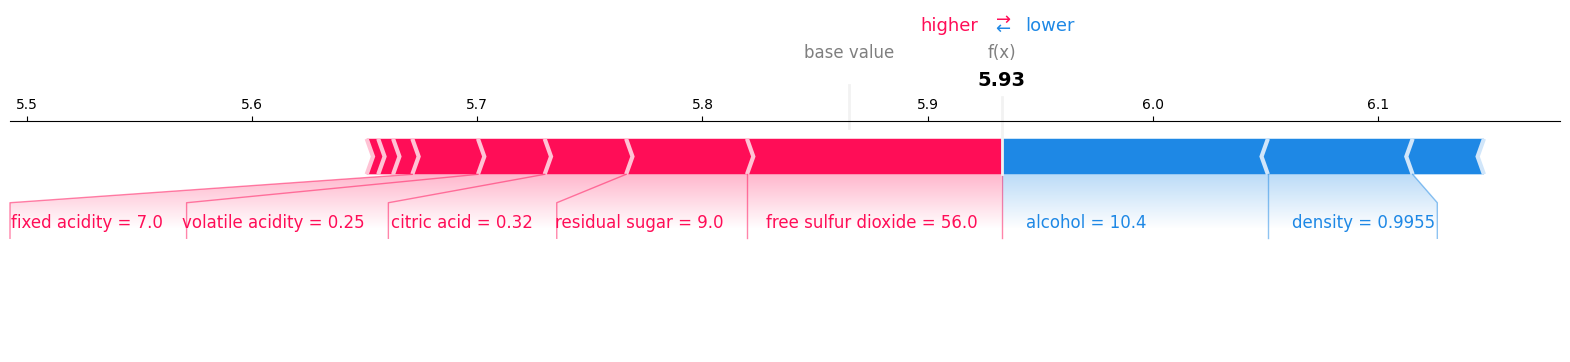

In [32]:
import dalex as dx

explainerForest = dx.Explainer(RFModel, X, y, label = 'Оценка информативности вклада признаков')
bd_tb = explainerForest.predict_parts(newDf_test, type = 'shap_wrapper') #, label=newDf.index[0]
bd_tb.plot()

In [33]:
bd_tb = explainerForest.predict_parts(newDf_test, type = 'break_down_interactions')
bd_tb.plot()

In [34]:
%%bash
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=3c3b9f6db608641688d4c52dcd14eed945dd215a9dbe61192a37e53c440111d1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [35]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['quality'], verbose=True, mode='regression')

In [37]:
# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test.values[j], RFModel.predict, num_features=7)

Intercept 6.037678346787653
Prediction_local [5.35153311]
Right: 4.966666666666667


In [38]:
exp.show_in_notebook(show_table=True)